#  Library Management System - Comprehensive Analysis Task

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load datasets
books_dataset = pd.read_csv('books_dataset.csv')
members_dataset = pd.read_csv('members_dataset.csv')
transactions_dataset = pd.read_csv('transactions_dataset.csv')

##  Dataset Overview

In [25]:
books_dataset.head()
# print(books_dataset.shape)    (500,5)

,Book_ID,Title,Author,Genre,Publication_Year
0,B001,The Quantum Enigma,Alice Johnson,Science,2018
1,B002,Shadows of Eternity,Mark Daniels,Fiction,2015
2,B003,Data Structures Unfolded,R. Gupta,Education,2021
3,B004,The Lost Civilization,Hannah Lee,History,2012
4,B005,AI and the Future,Carlos Mendez,Technology,2020


In [26]:
members_dataset.head()
# print(members_dataset.shape)  (500,4)

,Member_ID,Name,Age,Membership_Type
0,M001,Neha Sharma,22,Student
1,M002,Ravi Patel,34,Regular
2,M003,Aisha Khan,28,Premium
3,M004,John Doe,45,Regular
4,M005,Sara Mehta,19,Student


In [27]:
transactions_dataset.head()
transactions_dataset.describe()
# print(transactions_dataset.shape) (6687,4)

,Book_ID,Member_ID,Checkout_Date,Return_Date
count,6687,6687,6687,5741
unique,495,500,676,672
top,B012,M001,2023-05-16,2024-11-06
freq,48,17,19,128


### Observations


1.  Of the 6,687 books borrowed, 946 remain unreturned.
2.  Five books have never been borrowed
3.  Book having Book_ID B012 is borrowed most number of time i.e 48   times
4.  Member having Member_ID has borrowed books most number of times i.e 17 times


##  Key Analysis Areas

### **1. Most Popular Books and Authors**

In [28]:
# Which books have been borrowed the most times?
# book_id_freq = transactions_dataset['Book_ID'].value_counts()
# print(book_id_freq[book_id_freq > 39])

most_borrowed_books = transactions_dataset['Book_ID'].value_counts().nlargest(5)
print(most_borrowed_books)

Book_ID
B012    48
B192    45
B272    41
B144    40
B195    39
Name: count, dtype: int64


In [33]:
# Who are the top 10 most popular authors?
merged_data = pd.merge(transactions_dataset,books_dataset,on = 'Book_ID',how='left')
print(merged_data['Author'].value_counts().nlargest(10))                              # top 10 authors by the number of times their books have been borrowed

Author
Mark Daniels          300
Dr. Amara Okafor      299
Fatima Al-Zahra       272
Nadia Petrov          261
Rachel Kim            250
Jennifer Lopez        249
Ahmed Hassan          249
Sophie Martin         241
Hannah Lee            240
Isabella Rodriguez    239
Name: count, dtype: int64


In [42]:
# Are newer books more popular than older ones?
new_count = merged_data[merged_data['Publication_Year'] > 2013].shape[0]          # number of borrowed books published after 2013
old_count = merged_data[merged_data['Publication_Year'] <= 2013].shape[0]        # number of borrowed books pulished in or before 2013

print('Newer books are more popular then older ones') if new_count > old_count else print('Old books are more popular than new ones')

Newer books are more popular then older ones


In [51]:
# Do certain genres get borrowed more frequently?
print('Genres that are borroweded more frequently\n',merged_data['Genre'].value_counts().nlargest(5))

Genres that are borroweded more frequently
 Genre
Biography     697
Health        676
Technology    649
History       594
Education     537
Name: count, dtype: int64


### **2. Member Usage Patterns**

#### **Key Patterns to Discover**

In [64]:
# Which membership types borrow the most books?
members_transaction_merge = pd.merge(transactions_dataset,members_dataset,on='Member_ID',how = 'inner')
members_transaction_merge['Membership_Type'].value_counts().nlargest(1)

,count
Membership_Type,
Regular,2412


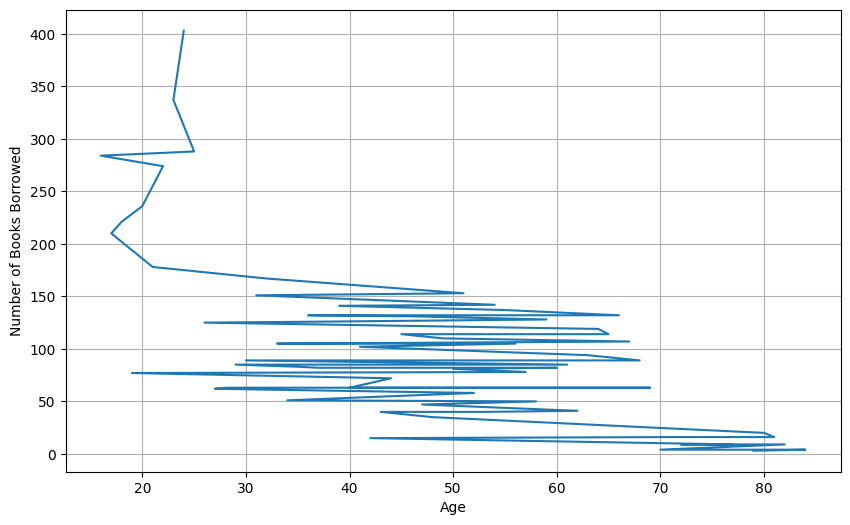

In [74]:
# How does borrowing frequency vary by age group?
age_counts_series = members_transaction_merge['Age'].value_counts()
ages = age_counts_series.index
counts = age_counts_series.values

plt.figure(figsize=(10, 6))
plt.plot(ages, counts)
plt.xlabel('Age')
plt.ylabel('Number of Books Borrowed')
plt.grid(True)
plt.show()

In [ ]:
# Are there seasonal borrowing patterns?


In [ ]:
# Who are the most active vs inactive members?

#### **Age Groups for Analysis:**